# Aprendizaje no supervisado: Clustering

El clustering es una técnica de aprendizaje no supervisado que agrupa datos en conjuntos (clusters) basándose en similitudes sin necesidad de etiquetas previas.

Habitualmente se puede usar antes del aprendizaje supervisado como forma de detectar grupos en los datos y mejorar los EDAs.

1. **KMeans**:
    - Divide los datos en K clusters, asignando cada punto al centroide (promedio) más cercano y minimizando la variación interna de cada grupo.
    - Requiere especificar $k$, el número de clusters.
    - Funciona bien cuando los clusters son “esféricos” y tienen varianzas similares.
    - Proporciona **inercia** y es rápido de entrenar.
    - Es sensible a la escala de los datos y a la inicialización de los centroides.
    - Cuándo usarlo: 
        - Si esperas que los clusters tengan formas aproximadamente esféricas y tamaños similares.
        - Cuando ya tienes una idea del número de clusters y buscas eficiencia en datasets grandes.

2. **DBSCAN**:
    - Agrupa puntos según la densidad, identificando regiones de alta concentración y separándolas de puntos aislados (ruido).
    - No requiere el número de clusters a priori.
    - Permite detectar **outliers** y trabajar con clusters de formas arbitrarias.
    - Muy sensible a los parámetros `eps` y `min_samples`.
    - No proporciona inercia, pero podemos usar silueta (con precaución en la presencia de outliers).
    - Cuándo usarlo:
        - Si los clusters pueden tener formas arbitrarias o irregulares.
        - Cuando hay ruido o outliers que deseas identificar como puntos aislados.

3. **AgglomerativeClustering**:
    - Es un método jerárquico que comienza considerando cada punto como un cluster individual y va fusionándolos de acuerdo a criterios de distancia, formando una estructura en forma de árbol (dendrograma)
    - Método jerárquico que va fusionando clusters.
    - Requiere especificar $n_{\text{clusters}}$ (u otro criterio de corte).
    - No tiene inercia, pero se puede usar el coeficiente de silueta para medir su desempeño.
    - El tipo de “linkage” (`ward`, `complete`, `single`, `average`) afecta los resultados.
    - Cuándo usarlo:
        - Si te interesa explorar la estructura jerárquica de los datos y no sabes de antemano cuántos clusters existen.
        - Cuando deseas entender la relación entre los clusters a distintos niveles de granularidad.

https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py

## KMeans

**K-Means** es un algoritmo de aprendizaje no supervisado cuyo objetivo es **agrupar** un conjunto de datos en $K$ grupos (clusters), sin que haya etiquetas o categorías predefinidas.

La idea principal es encontrar el punto central (centroide) que mejor represente cada cluster.

El resultado final son $K$ clusters, donde cada punto del dataset está asociado a uno de esos $K$ grupos. Se llama **K-Means** (“K medias”) porque, en cada iteración, los centroides se recalculan como la **media** de los puntos asignados a cada cluster.

**Ejemplo**: Si aplicamos KMeans a un conjunto de datos de clientes, podríamos encontrar que hay, por ejemplo, 4 clusters. Sin embargo, no sabemos automáticamente qué representa cada cluster. Tendríamos que analizar los datos de cada grupo (ingresos, edad, frecuencia de compras, etc.) para concluir que, por ejemplo, el Cluster 0 representa "clientes frecuentes con alto poder adquisitivo", mientras que el Cluster 1 representa "clientes ocasionales con compras pequeñas".

In [52]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

X, y = make_blobs(n_samples=500, centers=3, random_state=42, cluster_std=1.0)
print(X[:5])
print(y[:5])

[[-5.73035386 -7.58328602]
 [ 1.94299219  1.91887482]
 [ 6.82968177  1.1648714 ]
 [-2.90130578  7.55077118]
 [ 5.84109276  1.56509431]]
[2 1 1 0 1]


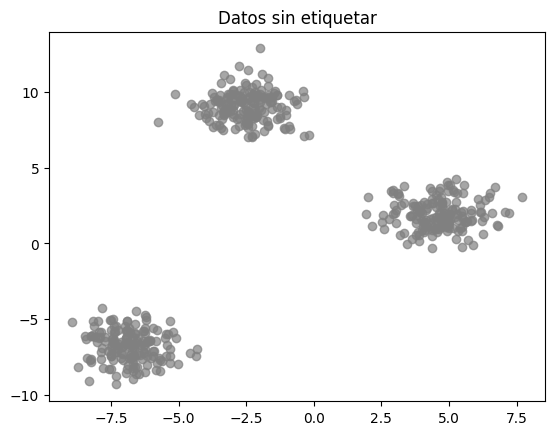

In [46]:
plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.7)
plt.title('Datos sin etiquetar');

In [47]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [48]:
from sklearn.metrics import silhouette_score

print('kmeans.labels_', kmeans.labels_[:10])
print('kmeans.cluster_centers_: \n', kmeans.cluster_centers_) # centroides
print('kmeans.inertia_', kmeans.inertia_)
print('silhouette_score', silhouette_score(X, kmeans.labels_))

kmeans.labels_ [1 0 0 2 0 0 1 0 0 1]
kmeans.cluster_centers_: 
 [[ 4.61416263  1.93184055]
 [-6.83120002 -6.75657544]
 [-2.51336974  9.03492867]]
kmeans.inertia_ 955.6493433489618
silhouette_score 0.8437565906781406


* cluster_centers_
    * Contiene las coordenadas de los centroides finales de cada uno de los clusters.
    * Muestra el punto medio de cada cluster en el espacio de características.
    * Si tienes datos en 2D, este atributo dará un array con la posición (x, y) de cada centroide.

* labels_
    * Es un array que indica a qué cluster pertenece cada muestra de los datos de entrada.
    * Permite identificar cómo se agruparon los datos originales, asignando un número de cluster a cada punto.

* inertia_
    * Es la suma de las distancias cuadradas mínimas entre cada punto y su centroide asignado.
    * Mide qué tan bien están agrupados los puntos alrededor de sus centroides.
    * Un valor bajo de inertia indica que los puntos están cerca de sus centroides, lo que sugiere que los clusters están bien formados y compactos.
    * Un valor alto de inertia indica que los puntos están dispersos o mal agrupados.

* feature_names_in_
    * Contiene los nombres de las características si los datos de entrada eran un DataFrame de Pandas.

* silhouette_score
    * Mide qué tan similar es un punto a los puntos de su cluster comparado con otros clusters.
    * Toma valores entre -1 y 1, mientras más cercano a uno, mejor está definido el cluster.

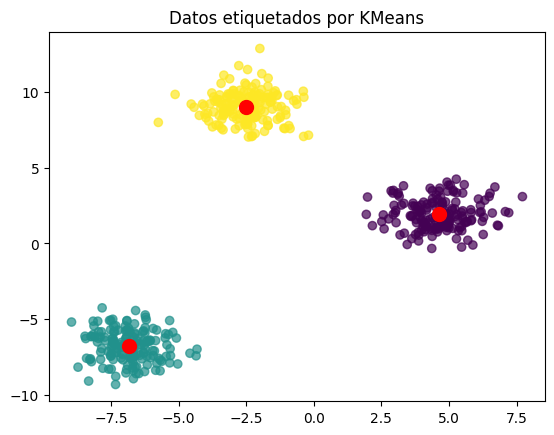

In [49]:
# dibujar los centroides y los clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, alpha=0.7, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=100)
plt.title('Datos etiquetados por KMeans');

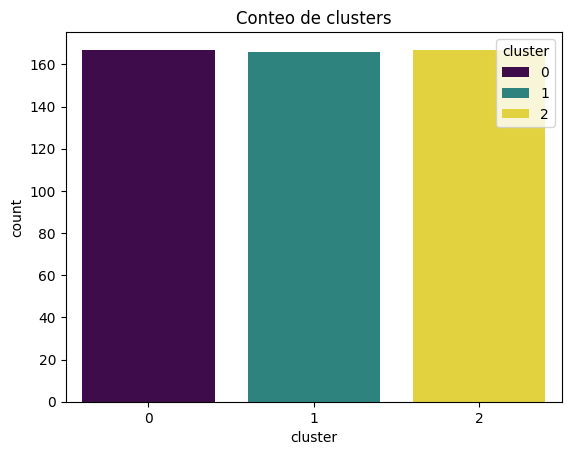

In [50]:
# countplot de los clusters
df_labels = pd.DataFrame({'cluster': kmeans.labels_})
sns.countplot(df_labels, x='cluster', palette='viridis', hue='cluster')
plt.title('Conteo de clusters');

In [51]:
from sklearn.metrics import accuracy_score, classification_report
# probar accuracy, en un caso real se supone que no tendríamos la "y" por lo que no podríamos hacerlo

# accuracy_score(y, kmeans.labels_)
print(classification_report(y, df_labels['cluster']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     167.0
           1       0.00      0.00      0.00     167.0
           2       0.00      0.00      0.00     166.0

    accuracy                           0.00     500.0
   macro avg       0.00      0.00      0.00     500.0
weighted avg       0.00      0.00      0.00     500.0



### Elección del número óptimo K o n_clusters

En muchos casos, $K$ no se conoce de antemano. Algunas estrategias para elegir $K$ son:

1. **Método del codo (Elbow method)**:  
   - Se calcula la inercia (suma de distancias al centro) para diferentes valores de $K$.
   - Se observa la gráfica de la inercia vs. $K$.
   - Se escoge el $K$ en el que la inercia deja de decrecer rápidamente y empieza a “aplanarse” (punto de codo).

2. **Coeficiente de silhouette**:  
   - Es una métrica que mide qué tan similar es un punto a los puntos de su cluster comparado con otros clusters.
   - Toma valores entre -1 y 1, mientras más cercano a 1, mejor definido está el cluster.

3. **Métodos de validación estadística** (Calinski-Harabasz, Davies-Bouldin, etc.):  
   - Son métricas específicas para evaluar la calidad de un agrupamiento

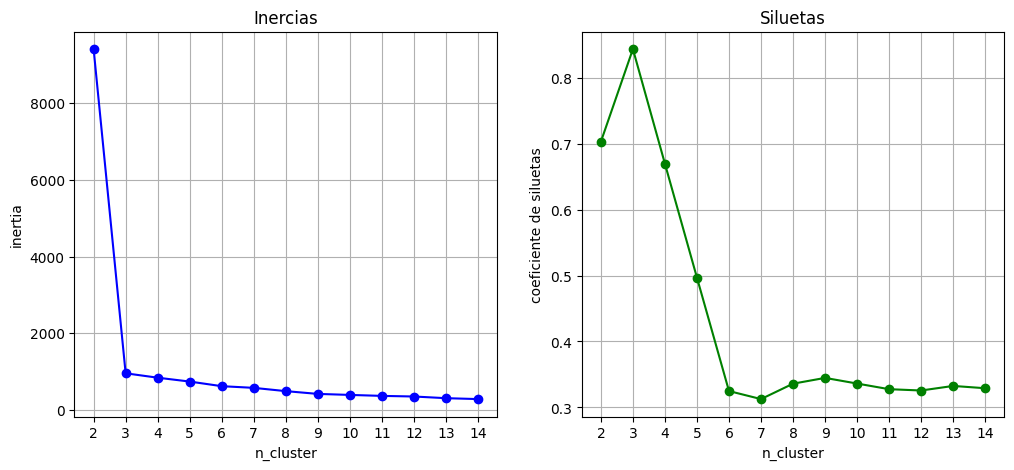

In [55]:
inertias = []
siluetas = []
k_range = range(2,15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    siluetas.append(silhouette_score(X, kmeans.labels_))
    
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o', color='blue')
plt.xlabel('n_cluster')
plt.ylabel('inertia')
plt.title('Inercias')
plt.xticks(k_range)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_range, siluetas, marker='o', color='green')
plt.xlabel('n_cluster')
plt.ylabel('coeficiente de siluetas')
plt.title('Siluetas')
plt.xticks(k_range)
plt.grid(True);

Método del codo (inertia): 

* En el gráfico de la izquierda, la inertia muestra una gran disminución hasta k=3, donde el descenso se ralentiza. Este es el punto del "codo" y sugiere que 3 podría ser un buen número de clusters según esta métrica.

Coeficiente de silueta: 

* En el gráfico de la derecha, el coeficiente de silueta alcanza su valor máximo en k=3 y comienza a disminuir a partir de ese punto.

* Esto refuerza la idea de que k=3 es un número óptimo de clusters, ya que es donde los clusters están mejor separados.

### KMeans en iris


K-Means (Iris) -> Inercia: 78.86
K-Means (Iris) -> Coeficiente de Silueta: 0.55


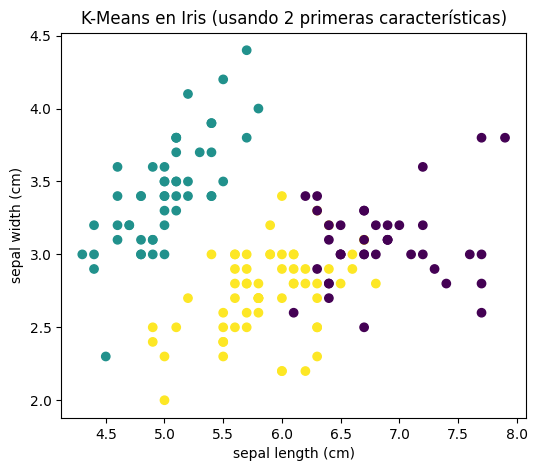

In [65]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

iris = load_iris()
X_iris = iris.data 
y_iris_true = iris.target  # Etiquetas reales (Setosa, Versicolor, Virginica)
feature_names = iris.feature_names

# scaler = RobustScaler()
# X_iris = scaler.fit_transform(X_iris)

kmeans_iris = KMeans(n_clusters=3, random_state=42)
kmeans_iris.fit(X_iris)

labels_kmeans_iris = kmeans_iris.labels_
inertia_kmeans_iris = kmeans_iris.inertia_
silhouette_kmeans_iris = silhouette_score(X_iris, labels_kmeans_iris)

print(f"K-Means (Iris) -> Inercia: {inertia_kmeans_iris:.2f}")
print(f"K-Means (Iris) -> Coeficiente de Silueta: {silhouette_kmeans_iris:.2f}")

plt.figure(figsize=(6, 5))
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=labels_kmeans_iris, cmap='viridis')
plt.title("K-Means en Iris (usando 2 primeras características)")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()

In [66]:
print(classification_report(y_iris_true, kmeans_iris.labels_))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        50
           2       0.23      0.28      0.25        50

    accuracy                           0.09       150
   macro avg       0.08      0.09      0.08       150
weighted avg       0.08      0.09      0.08       150



## DBSCAN

DBSCAN es un algoritmo de clustering basado en densidad. A diferencia de otros métodos como *k-means*, que necesita que especifiquemos el número de clusters, DBSCAN funciona explorando la estructura de densidad de los datos. 

En otras palabras, DBSCAN agrupa juntos puntos que están “cerca” unos de otros (según un criterio de densidad) y considera como ruido a los puntos que no cumplen ese criterio.


1. **Parámetros principales**:
   - **$\epsilon$ (eps)**: Es un radio de vecindad. Básicamente, indica la distancia máxima que se considerará para que dos puntos estén “cerca”. Si ϵ es demasiado pequeño, muchos puntos se marcan como “ruido” porque casi no tienen vecinos dentro del radio. Si es demasiado grande, varios grupos distintos podrían unificarse en un solo cluster.
   - **min_samples**: Número mínimo de puntos necesarios para considerar que un grupo de puntos (una “región”) es un cluster denso. Por ejemplo, si `min_samples=5`, al menos 5 puntos deben estar dentro del radio $\epsilon$ para formar un cluster.

2. **Clases de puntos**:
   - **Punto “central”** (core point): Es aquel que tiene al menos `min_samples` puntos (incluyéndose a sí mismo) dentro del radio $\epsilon$.
   - **Punto “alcanzable por densidad”** (density-reachable): No es un punto central, pero está a menos de $\epsilon$ de un punto central.
   - **Ruido (noise point)**: No es ni punto central ni alcanzable por densidad. Por lo tanto, no pertenece a ningún cluster y se considera “ruido” o “outlier”.

3. **Proceso del algoritmo**:
   - Se comienza con un punto que no ha sido visitado.
   - Se obtienen todos los puntos que están a menos de $\epsilon$ de ese punto. Si no se alcanza el umbral `min_samples`, ese punto se marca como ruido (aunque podría luego reclasificarse si se descubre que está dentro de un radio $\epsilon$ de un punto central).
   - Si se alcanza el umbral `min_samples`, se crea un nuevo cluster y se “propaga” por todos los puntos que están dentro del radio $\epsilon$ de ese punto, buscando nuevos puntos centrales y sus vecinos (ampliando así el cluster).
   - Se repite el proceso hasta que todos los puntos hayan sido visitados, asignándolos al cluster correspondiente o marcándolos como ruido.

Ventajas:

* No requiere especificar de antemano el número de clusters.
* Puede encontrar clusters de formas arbitrarias (no sólo esféricos como en KMeans).
* Identifica puntos atípicos (ruido) fácilmente.

Desventajas:

* Requiere ajustar los parámetros epsilon y min_samples, los cuales pueden variar mucho dependiendo del conjunto de datos.
* Si los datos tienen distinta densidad en distintas regiones, un solo valor de epsilon puede no ser óptimo para todas las zonas, lo que dificulta encontrar un buen equilibrio.

In [ ]:
from sklearn.cluster import DBSCAN

X, y = make_blobs(n_samples=500, centers=3, random_state=42, cluster_std=1.0)

# dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan.fit(X)

# DBSCAN no tiene inertia_
print('labels', dbscan.labels_[:15]) # contiene -1 en aquellas muestras que considera outliers similar a IsolationForest

labels [0 1 1 2 1 1 0 1 1 0 1 2 2 2 1]


In [76]:
filtro = (dbscan.labels_ != -1) # Filtramos outliers para poder calcular siluetas
silhouette_score(X[filtro], dbscan.labels_[filtro]) # cuanto más cercano a 1 mejor

np.float64(0.8443450328221088)

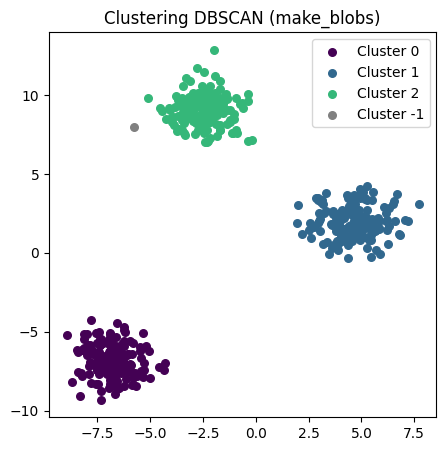

In [77]:
import numpy as np 

unique_labels = set(dbscan.labels_)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(5, 5))

# Asignamos un color distinto para el cluster -1 (puntos considerados outliers)
for label, col in zip(unique_labels, colors):
    class_member_mask = (dbscan.labels_ == label)
    if label == -1:
        col = 'gray' # Color gris para outliers
    
    plt.scatter(X[class_member_mask, 0], X[class_member_mask, 1], 
                c=[col], s=30, label=f"Cluster {label}")

plt.title("Clustering DBSCAN (make_blobs)")
plt.legend()
plt.show()

DBSCAN (Iris) -> Coeficiente de Silueta (núcleos): 0.74


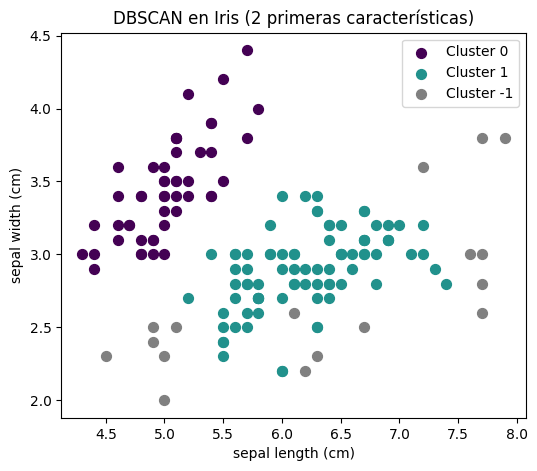

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X_iris = iris.data  
y_iris_true = iris.target 
feature_names = iris.feature_names

dbscan_iris = DBSCAN(eps=0.5, min_samples=5)
dbscan_iris.fit(X_iris)

labels_dbscan_iris = dbscan_iris.labels_

mask_core_iris = labels_dbscan_iris != -1

if np.sum(mask_core_iris) > 1:
    silhouette_dbscan_iris = silhouette_score(X_iris[mask_core_iris], labels_dbscan_iris[mask_core_iris])
    print(f"DBSCAN (Iris) -> Coeficiente de Silueta (núcleos): {silhouette_dbscan_iris:.2f}")
else:
    silhouette_dbscan_iris = None
    print("DBSCAN (Iris) -> No se pudo calcular silueta, pocos puntos en clusters.")


plt.figure(figsize=(6, 5))
unique_labels_iris = set(labels_dbscan_iris)
colors_iris = plt.cm.viridis(np.linspace(0, 1, len(unique_labels_iris)))

for label, col in zip(unique_labels_iris, colors_iris):
    class_member_mask_iris = (labels_dbscan_iris == label)
    if label == -1:
        col = 'gray'
    plt.scatter(X_iris[class_member_mask_iris, 0], X_iris[class_member_mask_iris, 1], 
                c=[col], s=50, label=f"Cluster {label}")

plt.title("DBSCAN en Iris (2 primeras características)")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend();

## AgglomerativeClustering

El *clustering jerárquico* es un conjunto de métodos de agrupamiento (clustering) que buscan construir una **jerarquía** de clusters. 

El resultado se suele representar con un **dendrograma**, que es una especie de árbol que muestra cómo los puntos se van agrupando (o separando) a medida que cambiamos el nivel de similitud.

A diferencia de otros métodos de clustering como *k-means*, **no** necesitamos especificar de antemano el número de clusters. Podemos, a posteriori, “cortar” el dendrograma al nivel deseado para obtener la cantidad de grupos que necesitamos.

### Dos enfoques: aglomerativo vs. divisivo

1. **Enfoque aglomerativo (bottom-up)**: 
   - Empieza con cada punto siendo su propio cluster (un cluster por cada muestra).
   - En cada paso, se **unen** los dos clusters más similares (o más cercanos).
   - Va “agrupando” hasta quedar en un solo cluster (o en los clusters que consideremos convenientes).
   - Es el más utilizado en la práctica.

2. **Enfoque divisivo (top-down)**:
   - Parte de **un único cluster** con todos los puntos.
   - En cada paso, se **divide** el cluster más heterogéneo en dos clusters según algún criterio, y así sucesivamente.
   - Es menos común y a menudo más costoso computacionalmente que el aglomerativo.

Generalmente, cuando hablamos de *clustering jerárquico* en la práctica, nos referimos al **enfoque aglomerativo**.

### Métrica de distancia y el criterio de enlace (linkage)

Para poder agrupar puntos, necesitamos medir la “distancia” o “similitud” entre ellos. 

Además, al agrupar clusters, también necesitamos medir la distancia entre los clusters ya formados. Esto se hace mediante dos conceptos:

1. **Métrica de distancia**:
   - Puede ser, por ejemplo, la distancia euclidiana, Manhattan, coseno, etc., dependiendo del dominio del problema y de la naturaleza de los datos.
   - Scikit-learn, por defecto, suele usar distancia euclidiana.

2. **Linkage (criterio de enlace)**:
   - Indica cómo calculamos la distancia entre dos clusters. Los criterios más comunes son:
     - **Single linkage** (enlace sencillo): la distancia entre dos clusters es la distancia **mínima** entre cualquier par de puntos (uno de cada cluster).
     - **Complete linkage** (enlace completo): la distancia entre dos clusters es la distancia **máxima** entre cualquier par de puntos.
     - **Average linkage** (enlace promedio): la distancia entre dos clusters es el **promedio** de todas las distancias entre pares de puntos (uno de cada cluster).
     - **Ward**: minimiza el incremento de la suma de cuadrados intra-cluster si se fusionan dos clusters (usa la varianza como criterio). Es muy popular para datos numéricos con distancia euclidiana.

El **Ward linkage** a menudo se recomienda cuando los datos tienen una escala continua y se busca un criterio similar a lo que hace *k-means* (minimizar la varianza dentro de los grupos).

El funcionamiento se suele representar en un **dendrograma**. A medida que se sube en el dendrograma, más clusters se van uniendo. Podemos “cortar” el dendrograma a un cierto nivel de altura para obtener un número determinado de clusters.

labels [1 2 2 0 2 2 1 2 2 1]
siluetas 0.8437565906781406


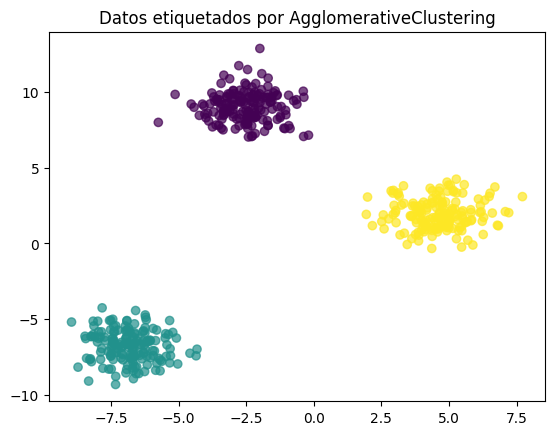

In [91]:
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(n_samples=500, centers=3, random_state=42, cluster_std=1.0)

clusterizer = AgglomerativeClustering(n_clusters=3)
clusterizer.fit(X)

print('labels', clusterizer.labels_[:10]) # no tiene inercias
print('siluetas', silhouette_score(X, clusterizer.labels_)) # cuanto más cercano a 1 mejor

plt.scatter(X[:, 0], X[:, 1], c=clusterizer.labels_, alpha=0.7, cmap='viridis')
plt.title('Datos etiquetados por AgglomerativeClustering');

## Dendrograma

Scikit learn no proporciona forma nativa para ver el dendrograma.

SciPy tiene linkage y dendrogram para poder calcularlo y verlo.

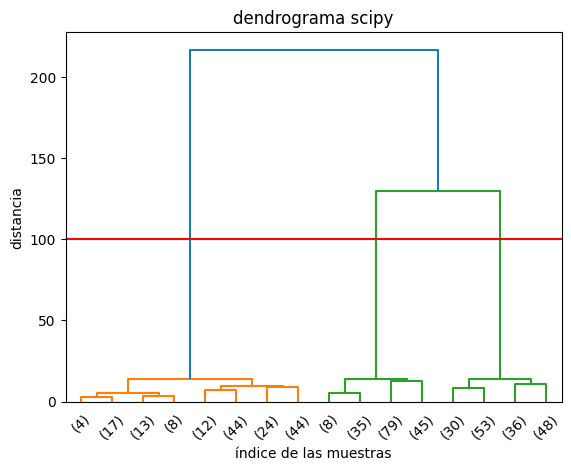

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Clustering algomerativo pero con scipy en vez de con scikit
Z = linkage(X, method='ward')


# dendrogram(Z)
dendrogram(Z, truncate_mode='level', p=3, leaf_rotation=45, leaf_font_size=10)
plt.title('dendrograma scipy')
plt.axhline(y=100, c='red')
plt.xlabel('índice de las muestras')
plt.ylabel('distancia');

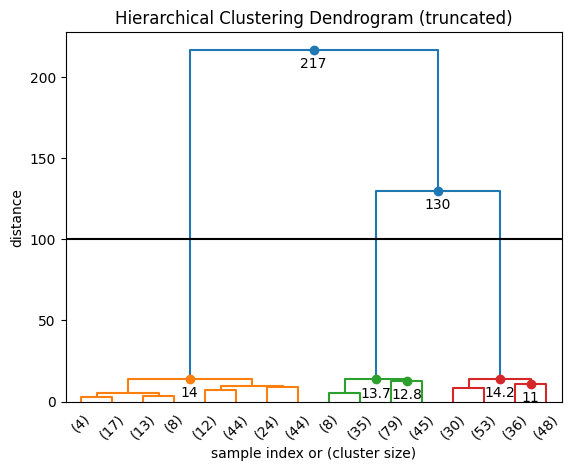

In [ ]:
# opcional, dendrograma customizado:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

fancy_dendrogram(Z, truncate_mode='level', p=3, leaf_rotation=45, leaf_font_size=10, max_d=100, annotate_above=10);

In [ ]:
# otra forma de obtener las labels es directamente con fit_predict

clusters = clusterizer.fit_predict(X)
clusters[:10] #lo mismo que clusterizer.labels_

array([1, 2, 2, 0, 2, 2, 1, 2, 2, 1])

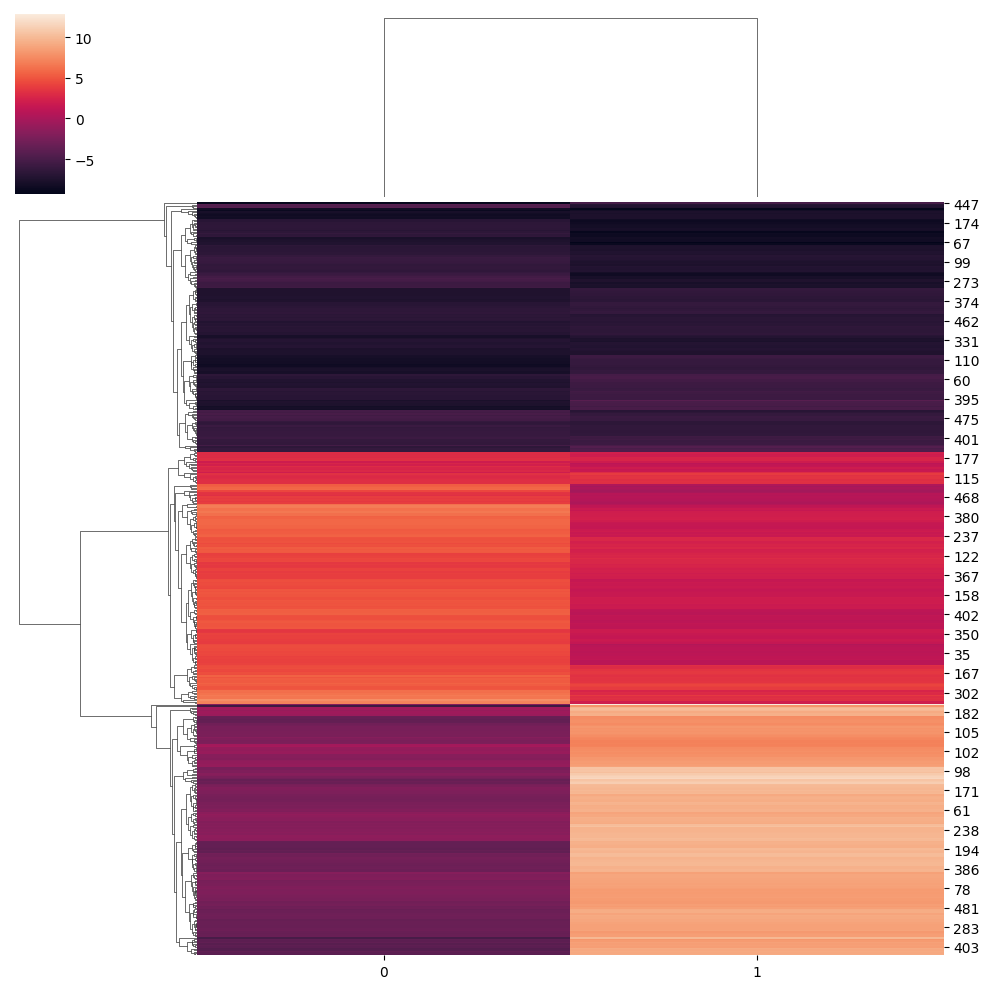

In [ ]:
sns.clustermap(X); # usa internamente scipy para el cálculo del dendrograma

### iris

Agglomerative (Iris) -> Coeficiente de Silueta: 0.55


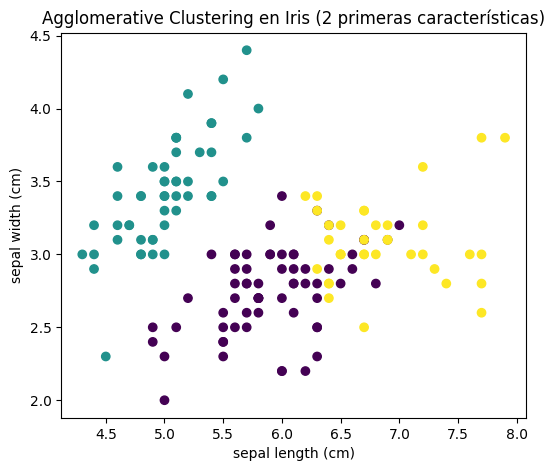

In [108]:
iris = load_iris()
X_iris = iris.data  
y_iris_true = iris.target 
feature_names = iris.feature_names

agg_iris = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_iris.fit(X_iris)

labels_agg_iris = agg_iris.labels_
silhouette_agg_iris = silhouette_score(X_iris, labels_agg_iris)

print(f"Agglomerative (Iris) -> Coeficiente de Silueta: {silhouette_agg_iris:.2f}")

plt.figure(figsize=(6, 5))
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=labels_agg_iris, cmap='viridis')
plt.title("Agglomerative Clustering en Iris (2 primeras características)")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1]);

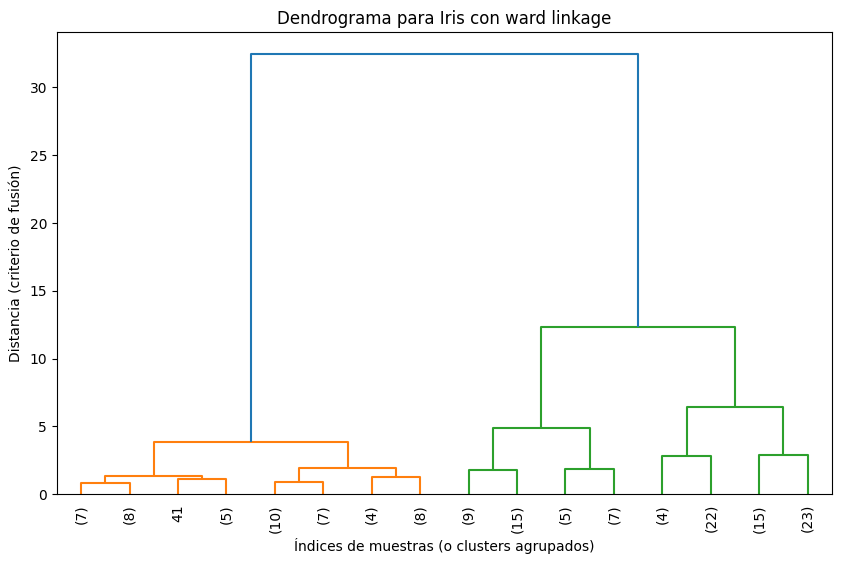

In [109]:
Z = linkage(X_iris, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(
    Z,
    truncate_mode='level',  # Modo de truncamiento (opcional)
    p=3,                    # Profundidad de niveles a mostrar
    leaf_rotation=90.,      # Rotar las etiquetas del eje x
    leaf_font_size=10.      # Tamaño de fuente de las etiquetas
)
plt.title("Dendrograma para Iris con ward linkage")
plt.xlabel("Índices de muestras (o clusters agrupados)")
plt.ylabel("Distancia (criterio de fusión)")
plt.show()

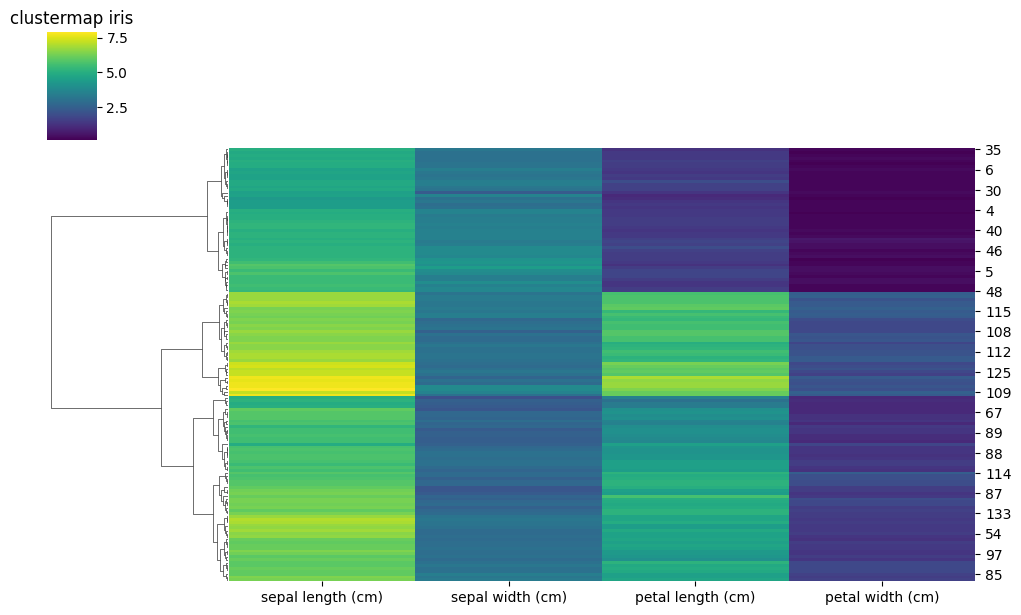

In [114]:
df_iris = pd.DataFrame(X_iris, columns=iris.feature_names)

sns.clustermap(df_iris, row_linkage=Z, cmap='viridis', col_cluster=False, figsize=(10, 6))
plt.title('clustermap iris');